In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
df = pd.read_csv("/content/AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [5]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


Text(0.5, 1.0, 'Energy Consumption According to Year')

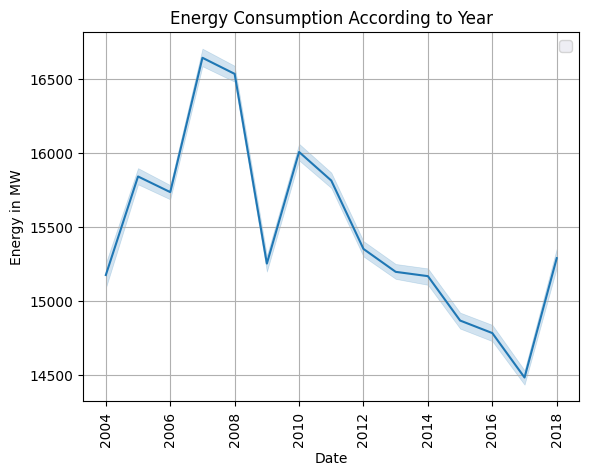

In [6]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
##ggplot is used unique set of colour palletes and easy visualization
style.use('ggplot')
#lineplot is used to to know energy consuption year by year
sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

In [10]:
NewDataSet = dataset.select_dtypes(include=['number']).resample('D').mean()
#resample to change freequency of time series , D specifies new freequency daily , mean function nean value for each day aggregates hourly data to daily data


In [11]:
print(NewDataSet.head(5))

                  AEP_MW  Month    Year  Week
Datetime                                     
2004-10-01  14284.521739   10.0  2004.0  40.0
2004-10-02  12999.875000   10.0  2004.0  40.0
2004-10-03  12227.083333   10.0  2004.0  40.0
2004-10-04  14309.041667   10.0  2004.0  41.0
2004-10-05  14439.708333   10.0  2004.0  41.0


In [12]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )


Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [17]:
TestData = NewDataSet.tail(100)
#creates New Data frame with row values for each day will be mean of the hourly data
Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [19]:
Training_Set

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-05-31,16741.083333
2018-06-01,15734.666667
2018-06-02,14212.166667


In [21]:
TestData

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [20]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [22]:
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [23]:
Train.shape

(4995, 1)

In [24]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [25]:
X_Train

array([[[0.27243207],
        [0.16328467],
        [0.09762599],
        ...,
        [0.25824495],
        [0.26316218],
        [0.46365355]],

       [[0.16328467],
        [0.09762599],
        [0.27451536],
        ...,
        [0.26316218],
        [0.46365355],
        [0.44824339]],

       [[0.09762599],
        [0.27451536],
        [0.28561719],
        ...,
        [0.46365355],
        [0.44824339],
        [0.43213937]],

       ...,

       [[0.25747674],
        [0.27701822],
        [0.34231935],
        ...,
        [0.48609085],
        [0.48114884],
        [0.39564069]],

       [[0.27701822],
        [0.34231935],
        [0.27429233],
        ...,
        [0.48114884],
        [0.39564069],
        [0.26628457]],

       [[0.34231935],
        [0.27429233],
        [0.27375423],
        ...,
        [0.39564069],
        [0.26628457],
        [0.23335788]]])

In [26]:
print(X_Train.shape[1])

60


In [28]:

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
lstm = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
lstm.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.2))

# Adding the output layer
lstm.add(Dense(units = 1))

# Compiling the RNN
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
print(lstm.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
lstm.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 1.0536e-04 - loss: 0.0295
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 42s 137ms/step - accuracy: 5.8344e-04 - loss: 0.0189
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 43s 151ms/step - accuracy: 2.6025e-04 - loss: 0.0180
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 146ms/step - accuracy: 2.1727e-04 - loss: 0.0170
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 4.8858e-04 - loss: 0.0156
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 2.0845e-04 - loss: 0.0149
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 2.3818e-04 - loss: 0.0154
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 1.1221e-04 - loss: 0.0150
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 5.4774e-04 - loss: 0.0130
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 1.8200e-04 - loss: 0.0108
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 4

In [31]:
TestData

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [33]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [34]:
Df_Total.shape

(5155, 1)

In [35]:
Df_Total

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-07-30,15368.083333
2018-07-31,15180.291667
2018-08-01,15151.166667


In [36]:

inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape


(160, 1)

In [37]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
#predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [38]:
X_test.shape

(100, 60, 1)

In [39]:
X_test

array([[[0.22930798],
        [0.20161713],
        [0.28176907],
        ...,
        [0.3460648 ],
        [0.39164743],
        [0.3169933 ]],

       [[0.20161713],
        [0.28176907],
        [0.33662329],
        ...,
        [0.39164743],
        [0.3169933 ],
        [0.17670174]],

       [[0.28176907],
        [0.33662329],
        [0.27883431],
        ...,
        [0.3169933 ],
        [0.17670174],
        [0.16023662]],

       ...,

       [[0.26628457],
        [0.23335788],
        [0.25909104],
        ...,
        [0.21920092],
        [0.36449468],
        [0.34853934]],

       [[0.23335788],
        [0.25909104],
        [0.22930798],
        ...,
        [0.36449468],
        [0.34853934],
        [0.3460648 ]],

       [[0.25909104],
        [0.22930798],
        [0.20161713],
        ...,
        [0.34853934],
        [0.3460648 ],
        [0.39164743]]])

In [42]:
# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_cost = lstm.predict(X_test)

# Do inverse Transformation to get Values
predicted_cost = sc.inverse_transform(predicted_cost)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step


In [43]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_cost
dates = TestData.index.to_list()

In [44]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [45]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13241.810547
1,2018-04-27,12964.000000,13203.613281
2,2018-04-28,12237.583333,14784.077148
3,2018-04-29,12156.791667,13272.503906
4,2018-04-30,13443.500000,12924.665039
...,...,...,...
95,2018-07-30,15368.083333,15473.339844
96,2018-07-31,15180.291667,15661.691406
97,2018-08-01,15151.166667,15184.566406
98,2018-08-02,15687.666667,15405.854492


In [47]:
print(True_MegaWatt)

[13157.791666666666, 12964.0, 12237.583333333334, 12156.791666666666, 13443.5, 13251.875, 13641.166666666666, 14217.25, 13725.625, 11902.166666666666, 11680.083333333334, 12972.5, 13295.083333333334, 13688.75, 13993.25, 13525.166666666666, 12942.916666666666, 12832.541666666666, 15004.75, 15171.791666666666, 13925.416666666666, 14465.666666666666, 13684.333333333334, 13044.166666666666, 13169.125, 14728.666666666666, 14857.125, 14489.583333333334, 14656.25, 15137.125, 13937.833333333334, 14198.333333333334, 15043.916666666666, 16904.375, 16799.25, 16741.083333333332, 15734.666666666666, 14212.166666666666, 13824.625, 14127.5, 13776.958333333334, 13451.041666666666, 14394.416666666666, 15040.041666666666, 14359.875, 13852.25, 14536.791666666666, 14744.041666666666, 15560.541666666666, 15520.416666666666, 15586.083333333334, 15299.041666666666, 16175.875, 18590.75, 18086.583333333332, 16902.125, 15547.375, 15273.333333333334, 14103.291666666666, 14440.208333333334, 15235.166666666666, 15

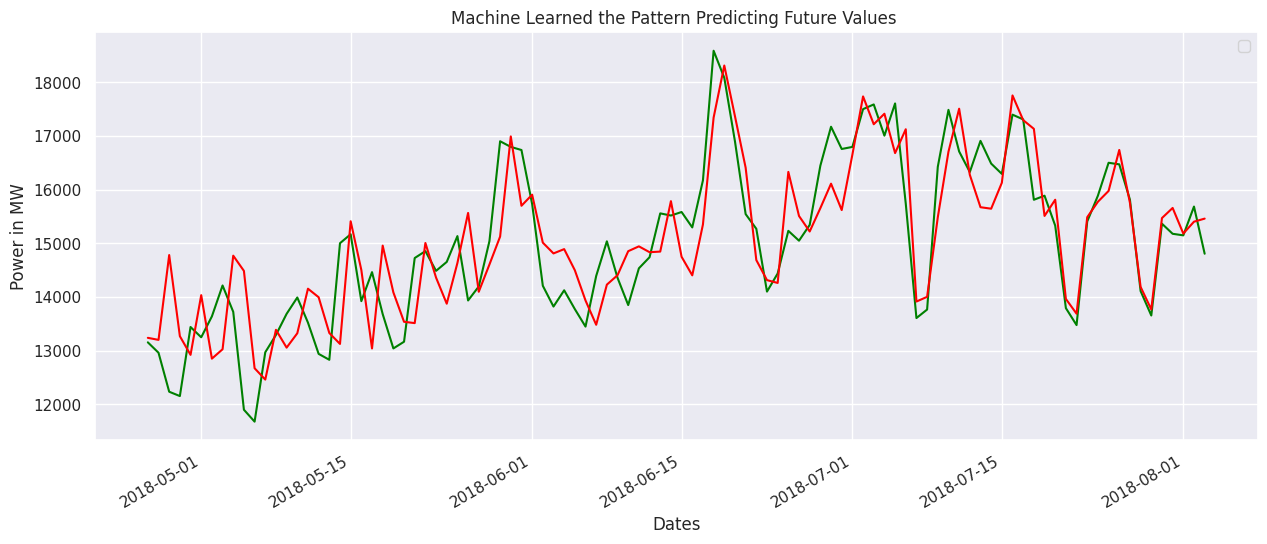

In [48]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

In [49]:
from sklearn.metrics import r2_score

r2_score_value = r2_score(True_MegaWatt, Predicted_MegaWatt)
print("R2 Score:", r2_score_value)

R2 Score: 0.6974553656250448
